In [33]:
import os
from os import path
import shutil
import pandas as pd
from matplotlib import pyplot as plt

In [34]:
# Fetch all regular motion files
target_path_1 = '../Traces_Real/Backlash'
target_path_2 = '../Traces_Real/PTP_Aut_Backlash_Comparator'
root_path = './'
fileNames_1 = os.listdir(target_path_1)
fileNames_2 = os.listdir(target_path_2)
fileNames_Backlash = [file for file in fileNames_1 if 'KRCIpo.csv' in file]
fileNames_Comparator = [file for file in fileNames_2 if 'KRCIpo.csv' in file]

for file in fileNames_Backlash:
    shutil.copy(path.join(target_path_1, file), root_path)

for file in fileNames_Comparator:
    shutil.copy(path.join(target_path_2, file), root_path)


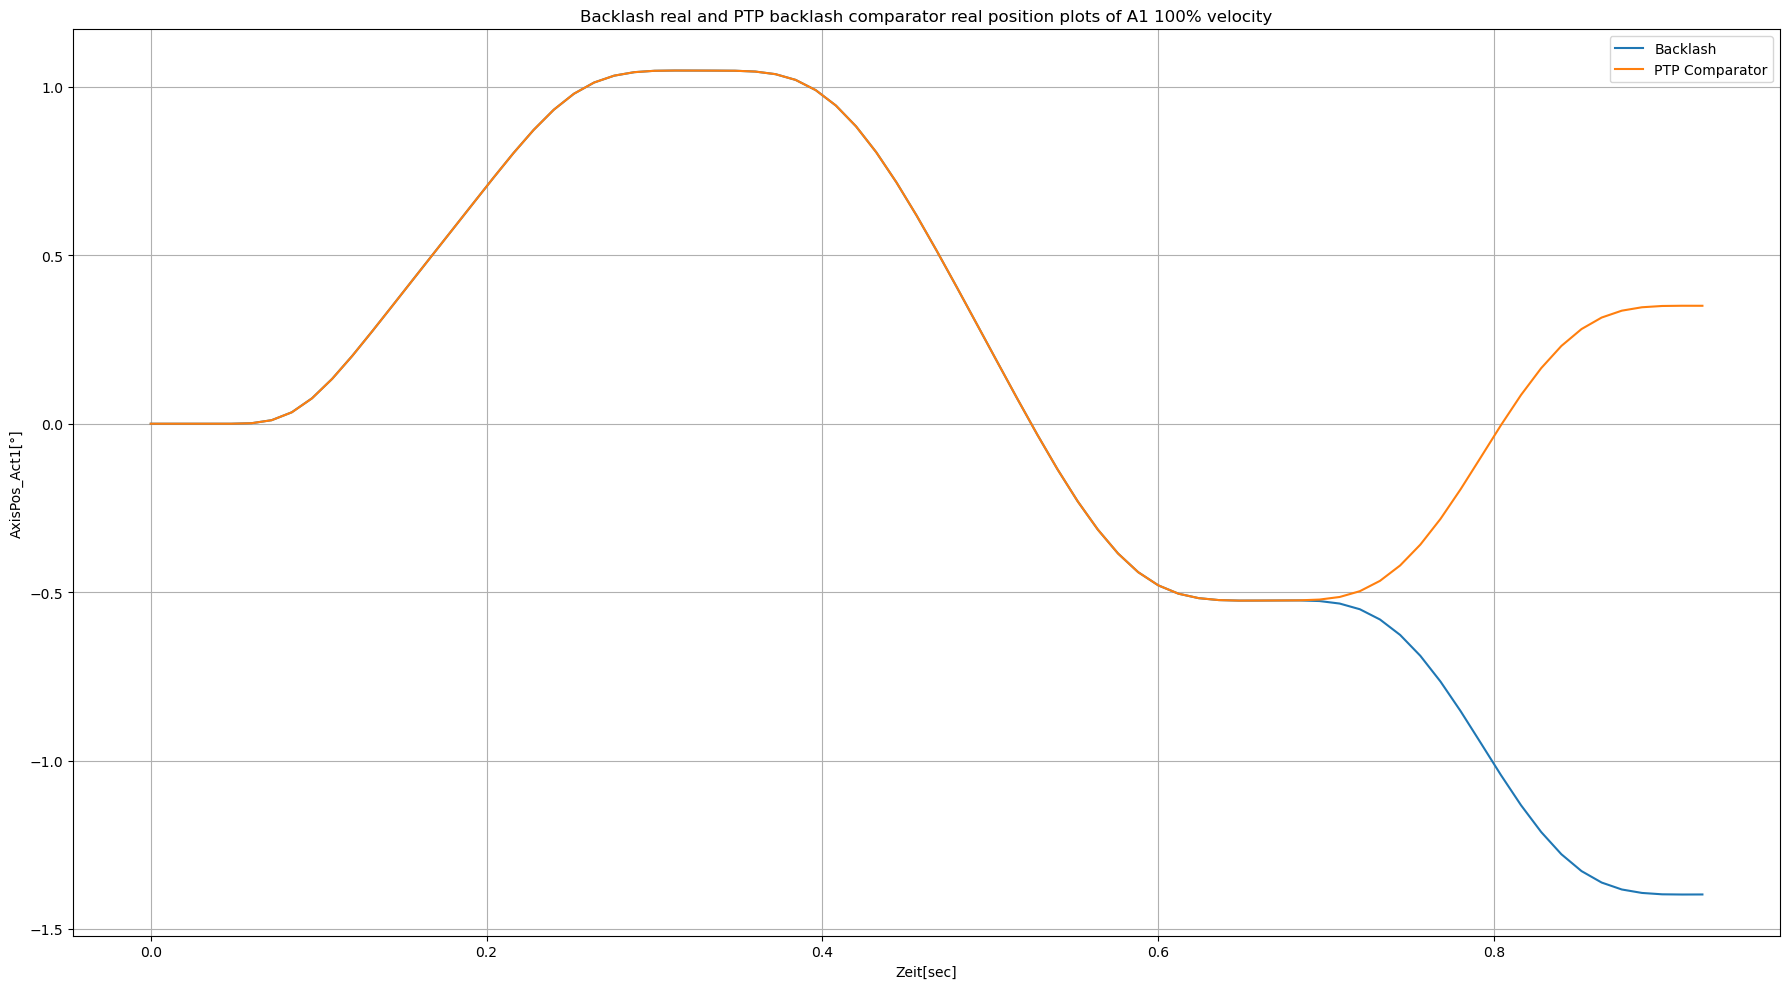

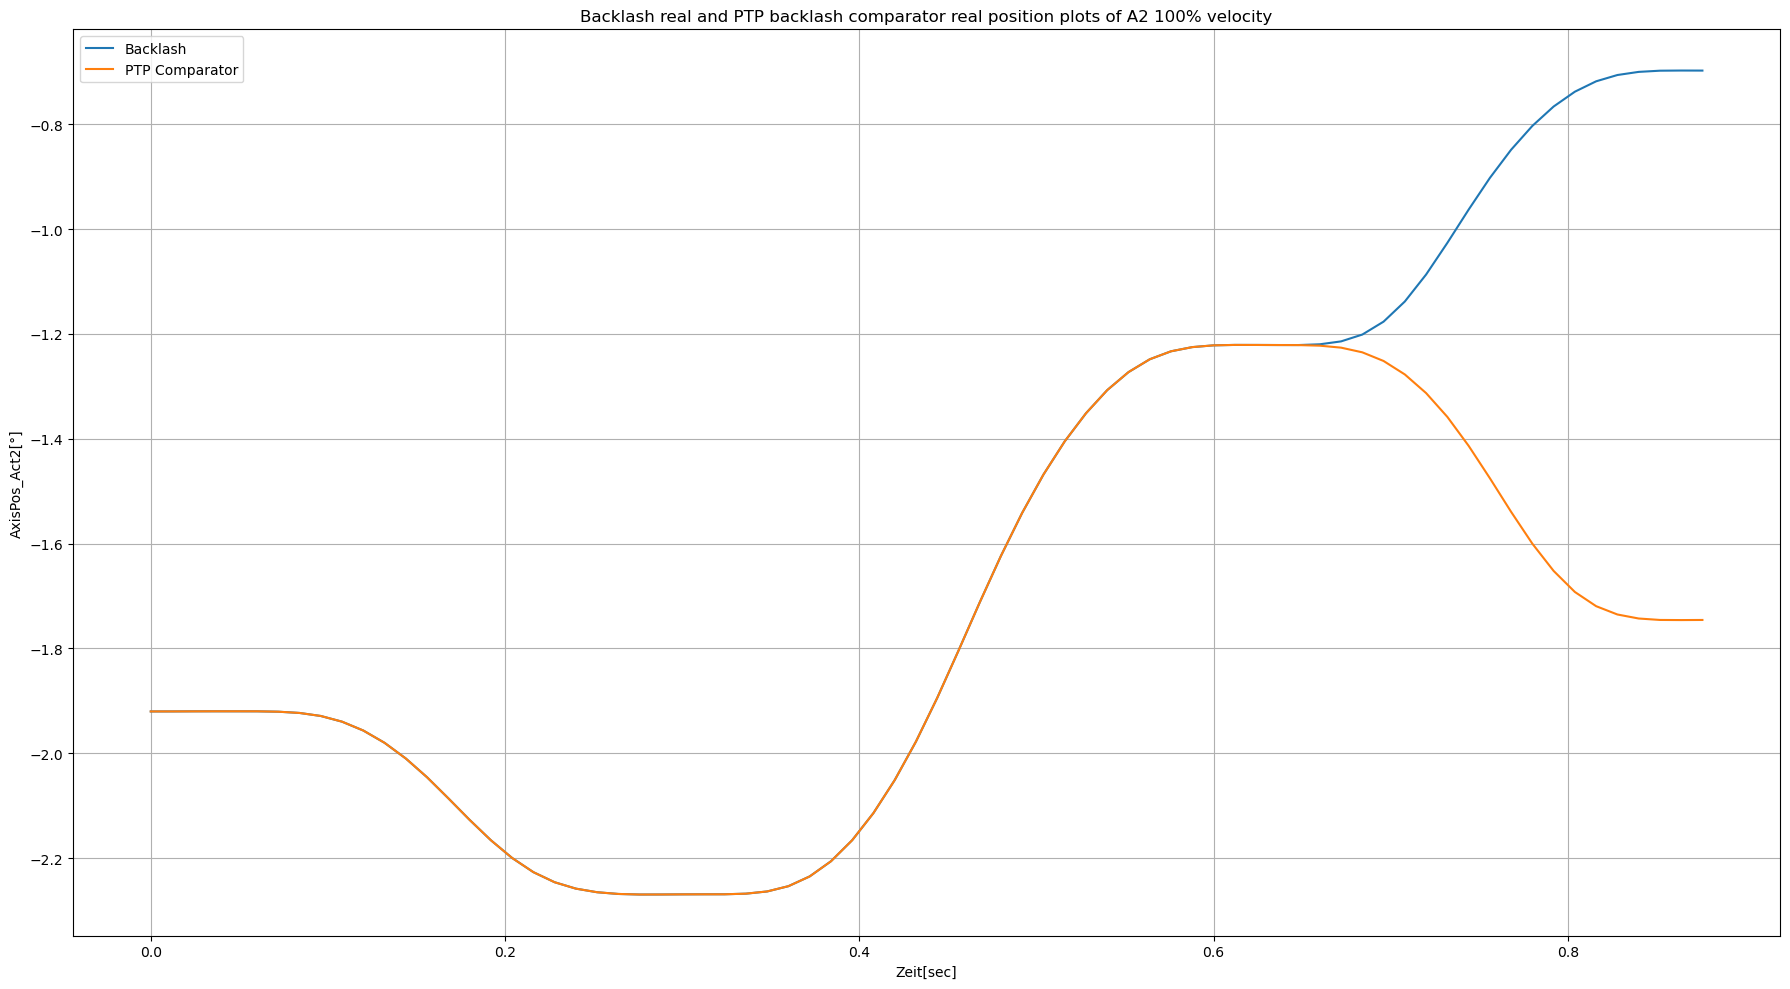

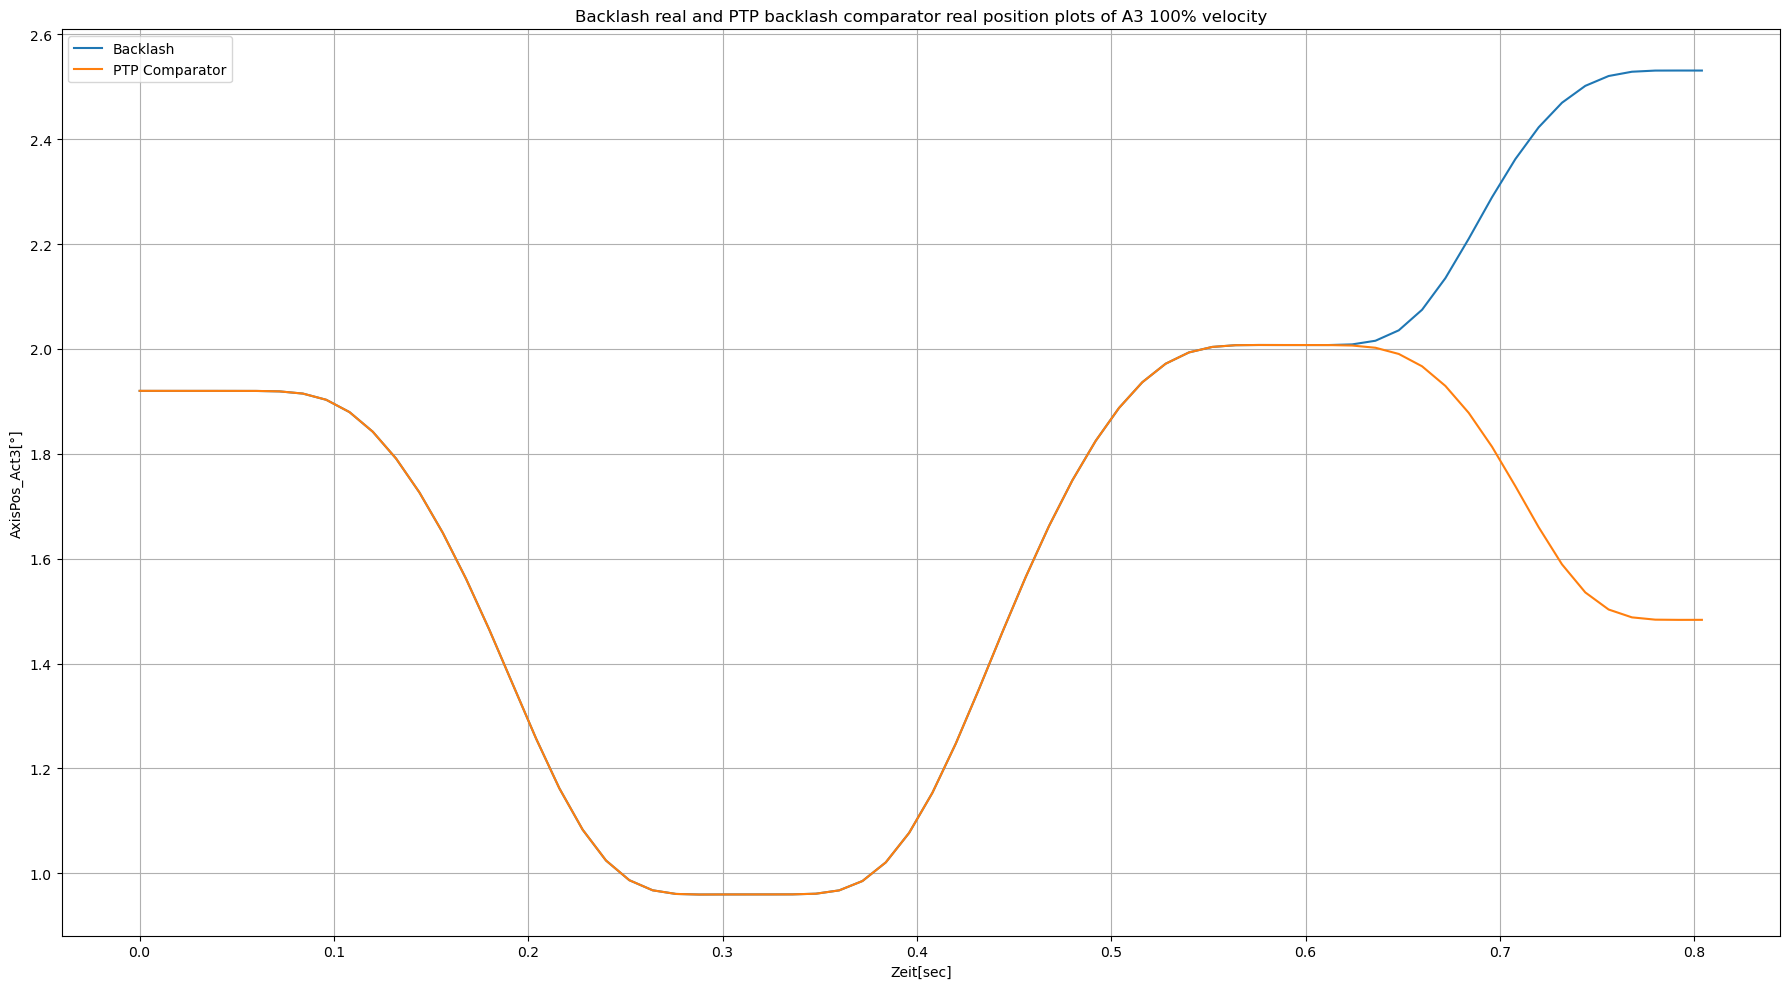

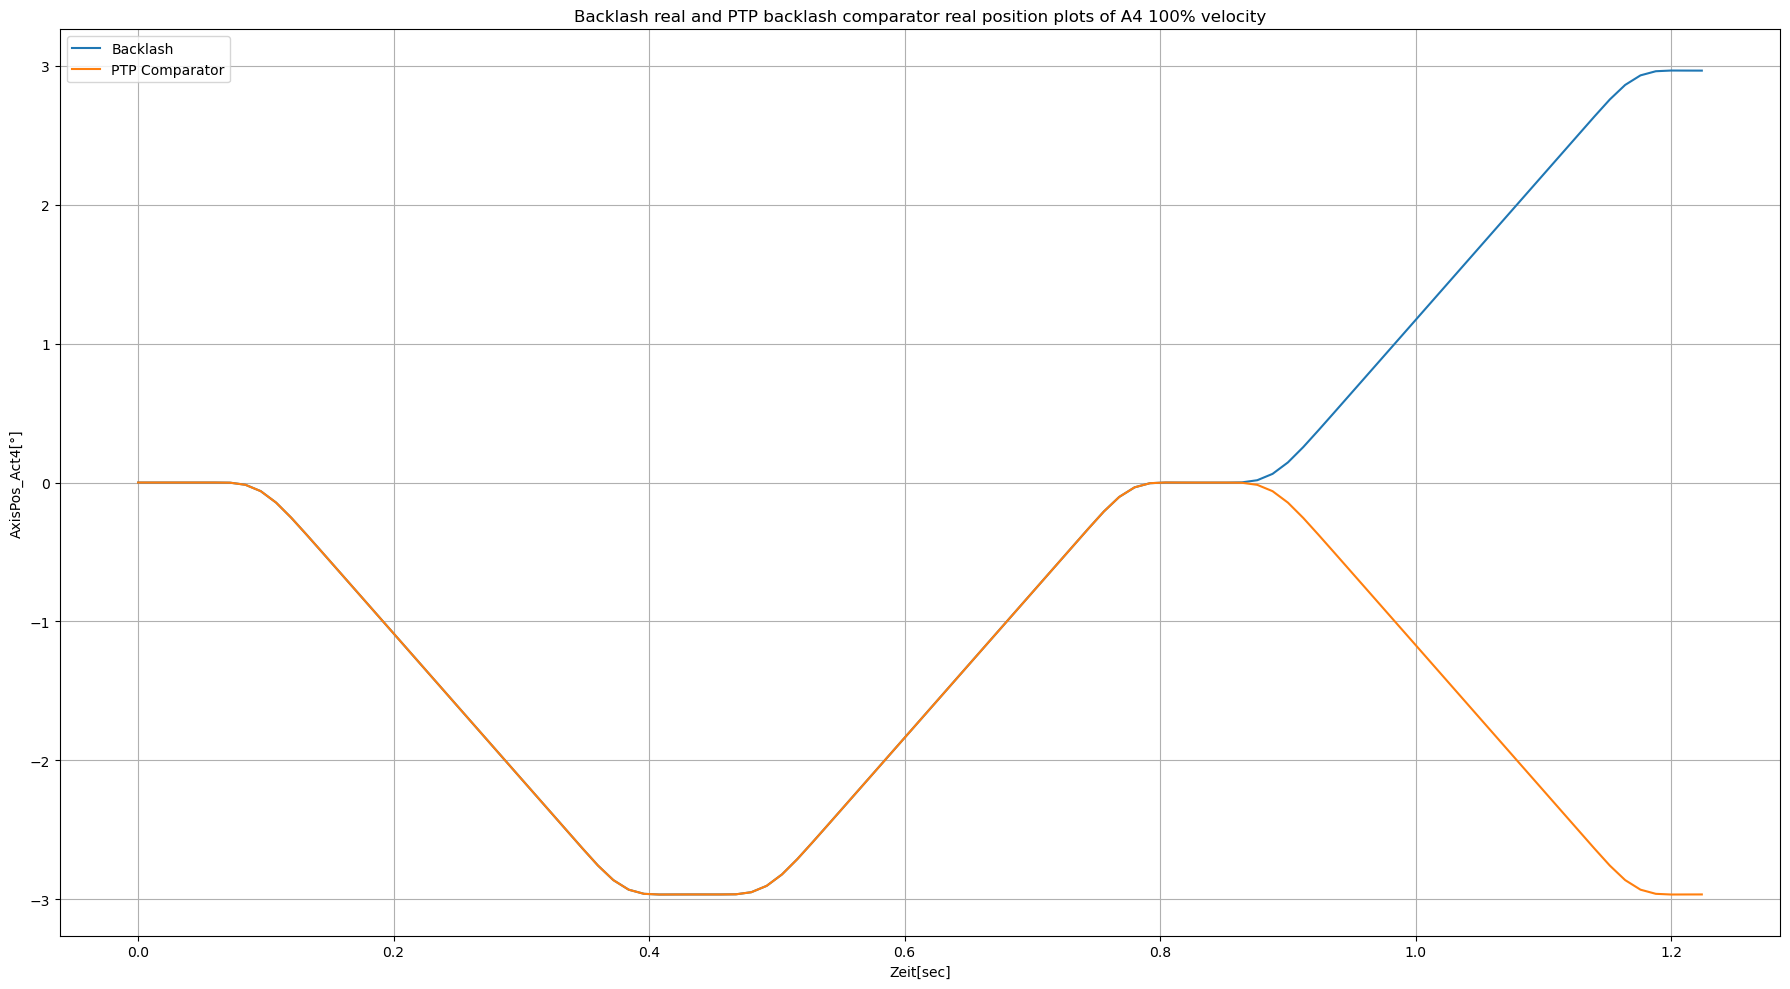

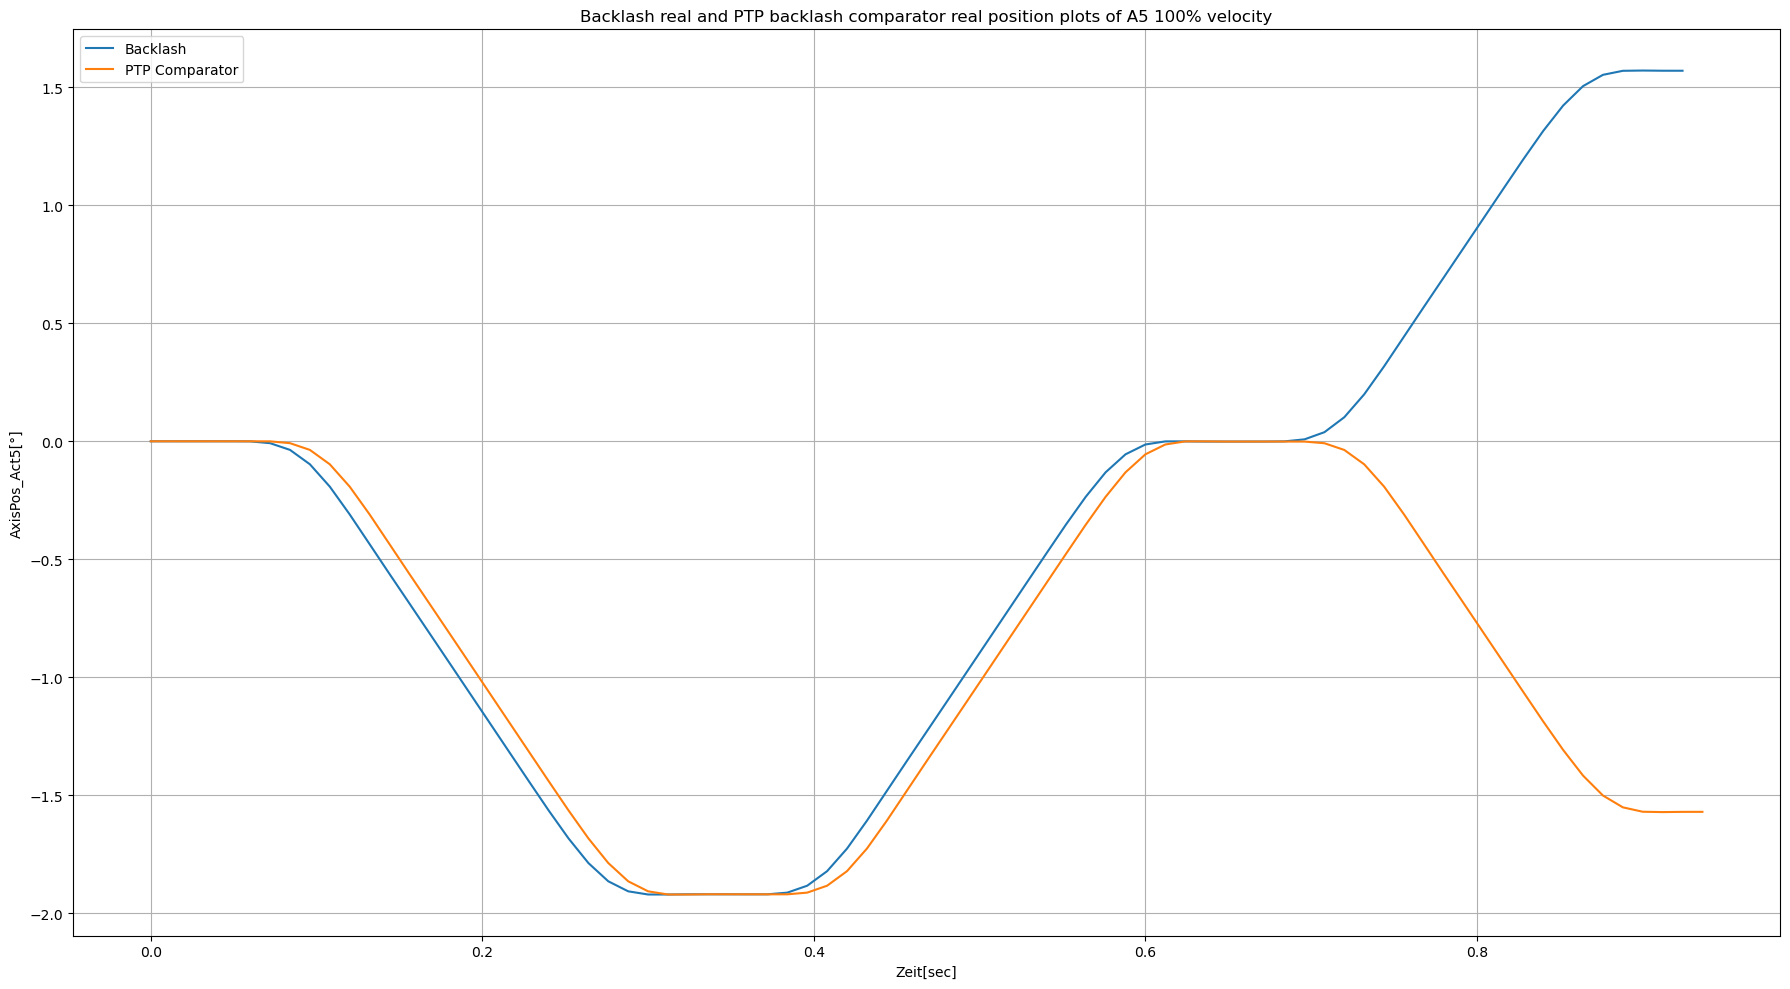

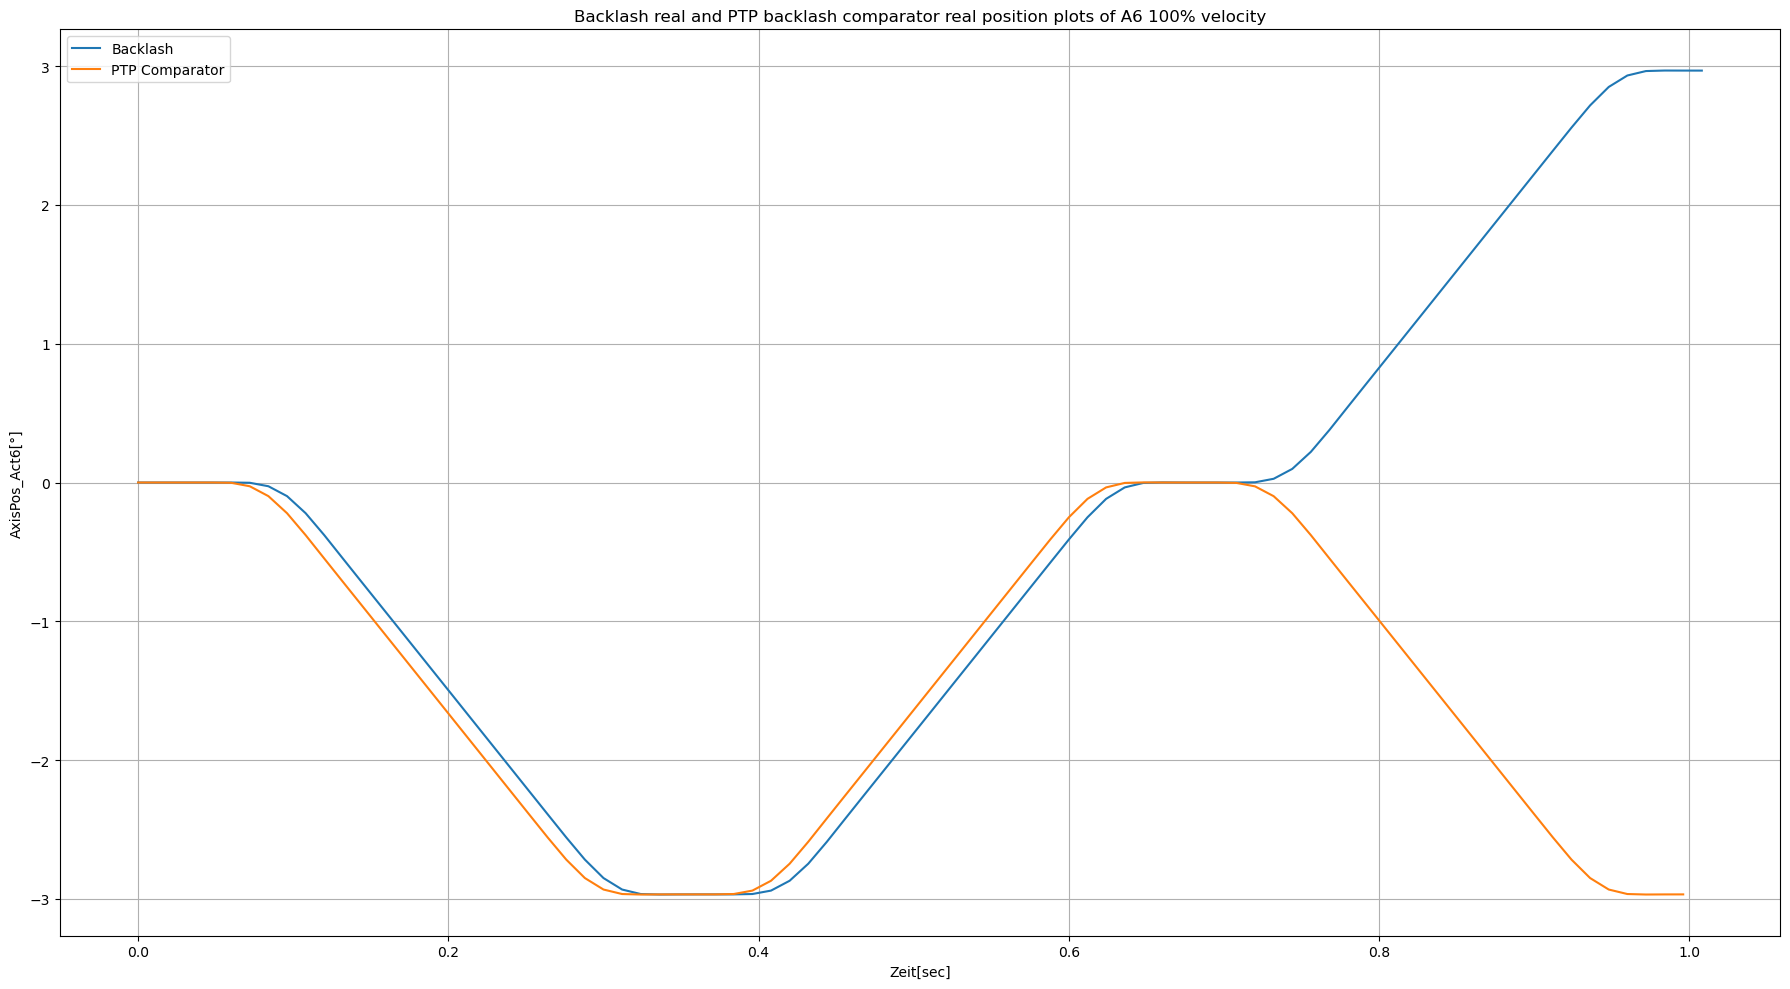

In [36]:
li_Backlash = []
li_Comparator =[]
if (len(fileNames_Backlash)==len(fileNames_Comparator)):
    for i in range (len(fileNames_Backlash)):
        df_Backlash = pd.read_csv(fileNames_Backlash[i], delimiter=';', encoding='cp1252')
        df_Comparator = pd.read_csv(fileNames_Comparator[i], delimiter=';', encoding='cp1252')
        li_Backlash.append(df_Backlash)
        li_Comparator.append(df_Comparator)
        pos_col_Backlash = li_Backlash[i].columns[i+7]
        pos_col_Comparator = li_Comparator[i].columns[i+7]

        # if (i==4):
        #     time_Shift = li_Backlash[i]['Zeit[sec]'] + 0.012
        #     li_Backlash[i]['Zeit[sec]'] = time_Shift
            
        plt.figure(figsize=(18,10), dpi=100, tight_layout=True)
        plt.plot(li_Backlash[i]['Zeit[sec]'], li_Backlash[i][pos_col_Backlash], label = 'Backlash')
        plt.plot(li_Comparator[i]['Zeit[sec]'], li_Comparator[i][pos_col_Comparator], label = 'PTP Comparator')
        plt.legend()
        plt.grid()
        # plt.xlim([0,1])
        # plt.ylim([0,1])
        plt.xlabel(li_Comparator[i].columns[0])
        plt.ylabel(li_Comparator[i].columns[i+7])
        plt.title('Backlash real and PTP backlash comparator real position plots of A' + str(i+1) +' 100% velocity')
        plt.savefig('Images/A' + str(i+1) + '.jpg')
        # plt.show()

       